In [1]:
# importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from scipy.stats import uniform
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from tabulate import tabulate
from keras.metrics import R2Score

In [2]:
# Reading the excel file using pandas
data = pd.read_excel('StateAndCategory.xlsx',header=1,skipfooter=5)
# Displaying the first 5 rows of the data
data.head()

,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Dollars 3 years ago,Unit sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change dollars 3 years,Percent change units 3 years
0,2019-10-06,Alabama,Alcohol,23611285,2974221.0,22449300.0,2979065.0,NaN,NaN,5.2,-0.2,NaN,NaN
1,2019-10-13,Alabama,Alcohol,23220758,2895573.0,23314625.0,2978312.0,NaN,NaN,-0.4,-2.8,NaN,NaN
2,2019-10-20,Alabama,Alcohol,21770283,2730939.0,21070374.0,2745973.0,NaN,NaN,3.3,-0.5,NaN,NaN
3,2019-10-27,Alabama,Alcohol,21956558,2764970.0,20188919.0,2651957.0,NaN,NaN,8.8,4.3,NaN,NaN
4,2019-11-03,Alabama,Alcohol,23183482,2872683.0,22565261.0,2884813.0,NaN,NaN,2.7,-0.4,NaN,NaN


In [3]:
data.shape

(88924, 13)

The Dataset contains 88,924 records stored for 13 variables.

In [4]:
# Checking the datatypes of each column
data.dtypes

Date                               object
State                              object
Category                           object
Dollars                             int64
Unit sales                        float64
Dollars last year                 float64
Unit sales last year              float64
Dollars 3 years ago               float64
Unit sales 3 years ago            float64
Percent change dollars 1 year     float64
Percent change units 1 year       float64
Percent change dollars 3 years    float64
Percent change units 3 years      float64
dtype: object

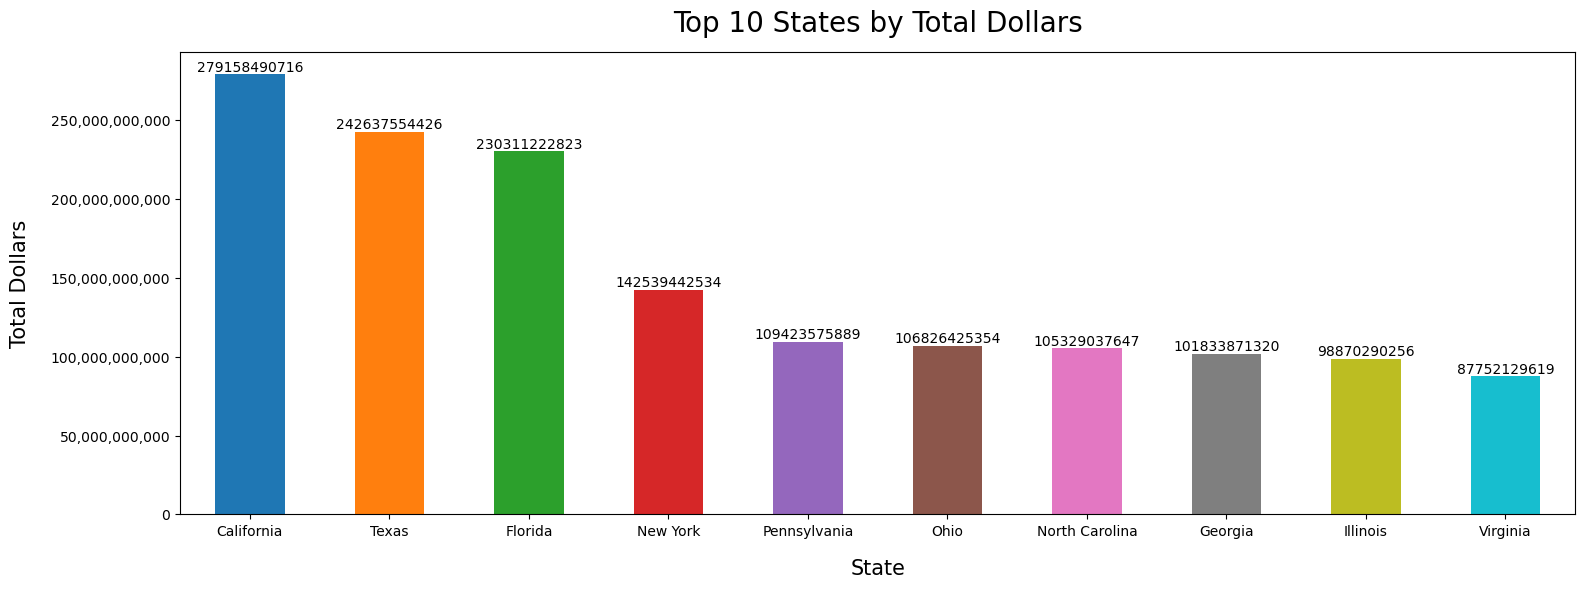

In [5]:
state_dollars = data.groupby('State')['Dollars'].sum()
# Sorting by sum of dollars in descending order and select top 10 states
top_10_states = state_dollars.sort_values(ascending=False).head(10)
# Plotting bar chart
colors = plt.cm.tab10(np.arange(len(top_10_states)))
bars = top_10_states.plot(kind='bar', color=colors, figsize=(18, 6))
for container in bars.containers:
    bars.bar_label(container,fmt='%.0f',size=10)
plt.title('Top 10 States by Total Dollars',pad=15,size=20)
plt.xlabel('State',labelpad=15,size=15)
plt.ylabel('Total Dollars',labelpad=15,size=15)
plt.xticks(rotation=0)

def format_ticks(x, pos):
    return '{:,.0f}'.format(x)

# Applying the formatter to the y-axis
formatter = FuncFormatter(format_ticks)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

It can be observed from the above bar chart that California has the highest sales revenue while virginia stands at the bottom among the top 10 states by sales revenue.

In [6]:
# Converting 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extracting year from 'Date' column
data['Year'] = data['Date'].dt.year

# Displaying the first 5 rows of the dataset.
data.head()

,Date,State,Category,Dollars,Unit sales,Dollars last year,Unit sales last year,Dollars 3 years ago,Unit sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change dollars 3 years,Percent change units 3 years,Year
0,2019-10-06,Alabama,Alcohol,23611285,2974221.0,22449300.0,2979065.0,NaN,NaN,5.2,-0.2,NaN,NaN,2019
1,2019-10-13,Alabama,Alcohol,23220758,2895573.0,23314625.0,2978312.0,NaN,NaN,-0.4,-2.8,NaN,NaN,2019
2,2019-10-20,Alabama,Alcohol,21770283,2730939.0,21070374.0,2745973.0,NaN,NaN,3.3,-0.5,NaN,NaN,2019
3,2019-10-27,Alabama,Alcohol,21956558,2764970.0,20188919.0,2651957.0,NaN,NaN,8.8,4.3,NaN,NaN,2019
4,2019-11-03,Alabama,Alcohol,23183482,2872683.0,22565261.0,2884813.0,NaN,NaN,2.7,-0.4,NaN,NaN,2019


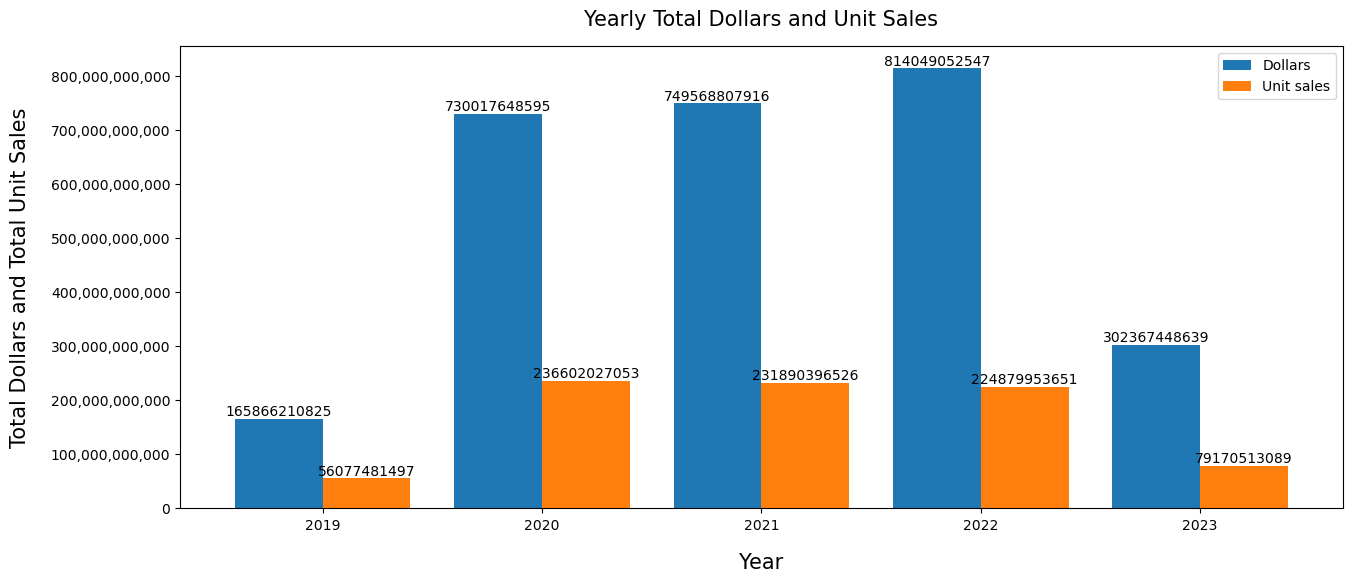

In [7]:
# Grouping by year and calculate sum of dollars and unit sales
yearly_totals = data.groupby('Year')[['Dollars', 'Unit sales']].sum()

# Plotting unstacked bar plot for top 5 categories
ax = yearly_totals.plot(kind='bar', stacked=False,figsize=(15, 6),width=0.8)
for container in ax.containers:
    ax.bar_label(container,fmt='%.0f',size=10)

plt.title('Yearly Total Dollars and Unit Sales',pad=15,size=15)
plt.xlabel('Year',labelpad=15,size=15)
plt.ylabel('Total Dollars and Total Unit Sales',labelpad=15,size=15)
plt.legend()
plt.xticks(rotation=0)

def format_ticks(x, pos):
    return '{:,.0f}'.format(x)

# Applying the formatter to the y-axis
formatter = FuncFormatter(format_ticks)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

It can be observed from the above chart that there is gradual increase in sales revenue during 2019 to 2022 and dipped during 2023. Also, unit sales did increase during 2019 to 2020 and then followed downward pattern till 2023.

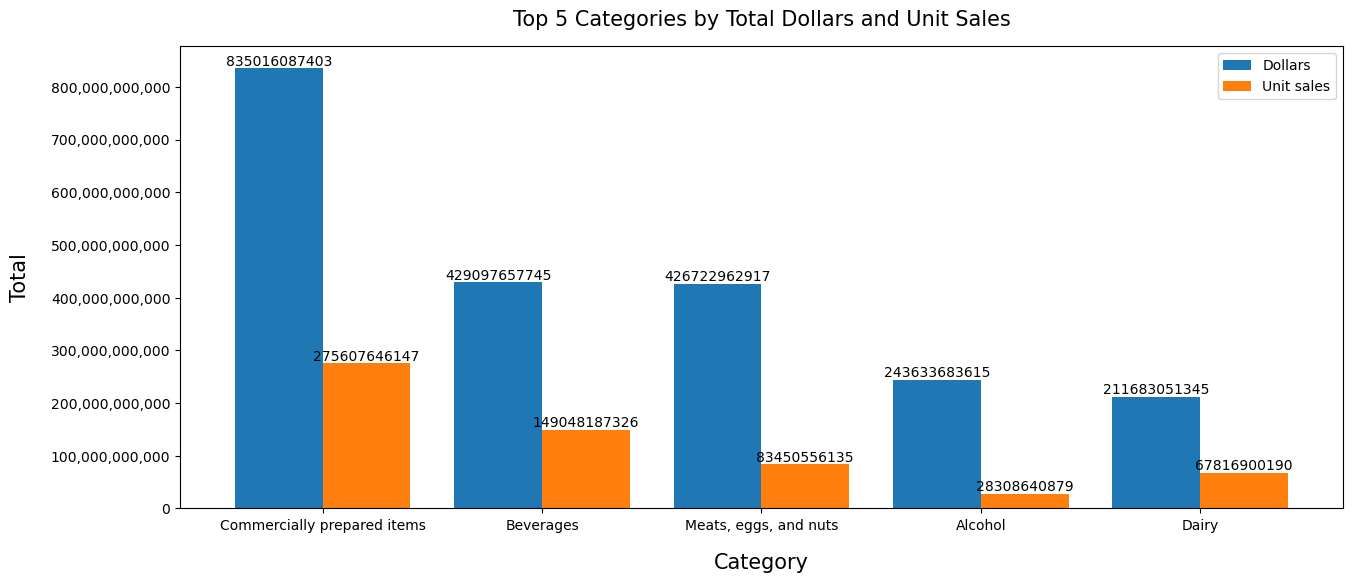

In [8]:
# Grouping by category and calculate sum of dollars and unit sales
category_totals = data.groupby('Category')[['Dollars', 'Unit sales']].sum()

# Getting top 5 categories based on sum of dollars
top_5_categories = category_totals.nlargest(5, 'Dollars')

# Plotting unstacked bar plot for top 5 categories
ax = top_5_categories.plot(kind='bar', stacked=False,figsize=(15, 6),width=0.8)

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f',size=10)

plt.title('Top 5 Categories by Total Dollars and Unit Sales',pad=15,size=15)
plt.xlabel('Category',labelpad=15,size=15)
plt.ylabel('Total',labelpad=15,size=15)
plt.xticks(rotation=0)

def format_ticks(x, pos):
    return '{:,.0f}'.format(x)

# Applying the formatter to the y-axis
formatter = FuncFormatter(format_ticks)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

It can be observed that among top 5 categories by sales revenue,<br>
* Sales revenue is highest for commercially prepared items and lowest for diary product categories.<br>
* Unit sales is highest for commercially prepared items and lowest for alocohol product categories.

In [9]:
# Checking if there are any missing values in each column
data.isnull().sum()

Date                                  0
State                                 0
Category                              0
Dollars                               0
Unit sales                           13
Dollars last year                   279
Unit sales last year                303
Dollars 3 years ago               49468
Unit sales 3 years ago            49470
Percent change dollars 1 year       279
Percent change units 1 year         303
Percent change dollars 3 years    49468
Percent change units 3 years      49483
Year                                  0
dtype: int64

It can be observed that except Date, State, Category, Dollars and Year columns all the other columns has missing values.

In [10]:
# Calculating median for numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns
median_values = data[numerical_columns].median()

# Replacing null values in numerical columns with their respective median values
data[numerical_columns] = data[numerical_columns].fillna(median_values)

In [11]:
# Checking if there are any missing values after handling missing values
data.isnull().sum()

Date                              0
State                             0
Category                          0
Dollars                           0
Unit sales                        0
Dollars last year                 0
Unit sales last year              0
Dollars 3 years ago               0
Unit sales 3 years ago            0
Percent change dollars 1 year     0
Percent change units 1 year       0
Percent change dollars 3 years    0
Percent change units 3 years      0
Year                              0
dtype: int64

There are no more missing values in all the columns.

In [12]:
# Splitting the data into train and test in the ratio of 80:20 respectively

split_index = int(0.8 * len(data))

# Exclude only the 'Year' column
columns_to_use = [col for col in data.columns if col != 'Date']

train_data = data[columns_to_use].iloc[:split_index]
test_data = data[columns_to_use].iloc[split_index:]

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (71139, 13)
Testing data shape: (17785, 13)


In [13]:
train_data.columns

Index(['State', 'Category', 'Dollars', 'Unit sales', 'Dollars last year',
       'Unit sales last year', 'Dollars 3 years ago', 'Unit sales 3 years ago',
       'Percent change dollars 1 year', 'Percent change units 1 year',
       'Percent change dollars 3 years', 'Percent change units 3 years',
       'Year'],
      dtype='object')

- Training Data: Used to train machine learning models. It consists of 71,139 samples, each described by 13 features.
- Testing Data: Used to evaluate the performance of trained models. It consists of 17,785 samples, also described by the same 13 features.

In [14]:
train_data.dtypes

State                              object
Category                           object
Dollars                             int64
Unit sales                        float64
Dollars last year                 float64
Unit sales last year              float64
Dollars 3 years ago               float64
Unit sales 3 years ago            float64
Percent change dollars 1 year     float64
Percent change units 1 year       float64
Percent change dollars 3 years    float64
Percent change units 3 years      float64
Year                                int32
dtype: object

In [15]:
# Applying log_10 to the target values.

y_train =  np.log10(train_data['Unit sales'].values)
y_test  =  np.log10(test_data['Unit sales'].values)

In [16]:
# Dropping the unit sales from the data since its a traget column
# Dropping 'State' and 'Category' categorical columns and 'Year' Column

X_train = train_data.drop(['Unit sales','State','Category','Year'],axis=1)
X_test  = test_data.drop(['Unit sales','State','Category','Year'],axis=1)

In [17]:
# Defining preprocessing steps for numerical columns
preprocessor = Pipeline([('scaler', StandardScaler())]) # Standardizing features

In [18]:
X_train.head(2)

,Dollars,Dollars last year,Unit sales last year,Dollars 3 years ago,Unit sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change dollars 3 years,Percent change units 3 years
0,23611285,22449300.0,2979065.0,12730660.5,4163512.0,5.2,-0.2,22.6,-0.1
1,23220758,23314625.0,2978312.0,12730660.5,4163512.0,-0.4,-2.8,22.6,-0.1


So, I have considered only the numerical columns for modelling which are shown as below<br>
* Dollars
* Dollars last year
* Unit Sales Last year
* Dollars 3 years ago
* Unit Sales 3 years ago
* Percent change dollars 1 year
* Percent change units 1 year
* Percent change dollars 3 years
* Percent change units 3 years

In [19]:
import seaborn as sns
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Set titles and labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the plot
plt.show()

NameError: name 'correlation_matrix' is not defined

<Figure size 1200x1000 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

# Assuming you have a correlation matrix called 'correlation_matrix'
# Replace 'correlation_matrix' with the name of your actual correlation matrix variable

# Create a heatmap plot of the correlation matrix
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(ticks=range(len(correlation_matrix)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(correlation_matrix)), labels=correlation_matrix.index)
plt.show()


NameError: name 'correlation_matrix' is not defined

In [21]:

LR = LinearRegression()

# Creating pipeline
pipeline = Pipeline([('preprocessor', preprocessor),  # Preprocessing
                     ('model', LR) ])  # Linear Regression model

# Hyperparameters
param_distributions = {'model__fit_intercept':[1,0]}

# Tuning using random search cv
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=3, cv=2,
                                   scoring='neg_mean_squared_error', random_state=42, verbose=2)

# Fitting RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Get best model from RandomizedSearchCV
best_model_lr = random_search.best_estimator_

# Predict on train and test data
y_train_pred = best_model_lr.predict(X_train)
y_test_pred  = best_model_lr.predict(X_test)

# Calculating mean squared error on train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# Calculating R2 Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

print('\n')
print("Mean Squared Error on train data:", mse_train)
print("Mean Squared Error on test data :", mse_test)
print('\n')
print("R2 Score on train data:", r2_train)
print("R2 Score on test data :", r2_test)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END .............................model__fit_intercept=1; total time=   0.0s
[CV] END .............................model__fit_intercept=1; total time=   0.0s
[CV] END .............................model__fit_intercept=0; total time=   0.0s
[CV] END .............................model__fit_intercept=0; total time=   0.0s


Mean Squared Error on train data: 0.18070367425962833
Mean Squared Error on test data : 0.552785032425567


R2 Score on train data: 0.5201655263365913
R2 Score on test data : 0.14686006763834403


- The MSE values are relatively small, indicating that the model's predictions are somewhat close to the actual values.
- However, the R2 Score on the test data is quite low, suggesting that the model may not be capturing much of the variability in the data.
- We need to enhance the performance of the linear regression model by feature engineering to create more informative features or transform existing ones.


In [22]:
# 2. Support Vector Regression

svr = SVR()

# Creating pipeline
pipeline = Pipeline([('preprocessor', preprocessor),  # Preprocessing
                     ('model', svr)  ])

# Hyperparameters
param_distributions = { 'model__C': uniform(loc=0, scale=10),  # Penalty parameter C
                        'model__gamma': uniform(loc=0, scale=1),  # Kernel coefficient gamma
                        'model__epsilon': uniform(loc=0, scale=1),  # Epsilon in epsilon-SVR
                       }

# Tuning using random search cv
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=3, cv=2,
                                   scoring='neg_mean_squared_error', random_state=42, verbose=2)

# Fitting RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Get best model from RandomizedSearchCV
best_model_svr = random_search.best_estimator_

# Predict on train and test data
y_train_pred = best_model_svr.predict(X_train)
y_test_pred  = best_model_svr.predict(X_test)

# Calculating mean squared error on train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# Calculating R2 Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

print('\n')
print("Mean Squared Error on train data:", mse_train)
print("Mean Squared Error on test data :", mse_test)
print('\n')
print("R2 Score on train data:", r2_train)
print("R2 Score on test data :", r2_test)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END model__C=3.745401188473625, model__epsilon=0.9507143064099162, model__gamma=0.7319939418114051; total time=   0.8s
[CV] END model__C=3.745401188473625, model__epsilon=0.9507143064099162, model__gamma=0.7319939418114051; total time=   1.2s
[CV] END model__C=5.986584841970366, model__epsilon=0.15601864044243652, model__gamma=0.15599452033620265; total time=   6.3s
[CV] END model__C=5.986584841970366, model__epsilon=0.15601864044243652, model__gamma=0.15599452033620265; total time=   7.4s
[CV] END model__C=0.5808361216819946, model__epsilon=0.8661761457749352, model__gamma=0.6011150117432088; total time=   0.8s
[CV] END model__C=0.5808361216819946, model__epsilon=0.8661761457749352, model__gamma=0.6011150117432088; total time=   1.4s


Mean Squared Error on train data: 0.01705866566837682
Mean Squared Error on test data : 0.05960125147543459


R2 Score on train data: 0.9547029915361585
R2 Score on test data : 0.9080144999

In [23]:
# 3. K Nearest Neighbors

knn = KNeighborsRegressor()

# Creating pipeline
pipeline = Pipeline([('preprocessor', preprocessor),  # Preprocessing
                     ('model', knn)])
# Hyperparameters
param_distributions = {'model__n_neighbors': randint(1, 20)} # number of neighbors

# Tuning using random search cv
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=3, cv=2,
                                   scoring='neg_mean_squared_error', random_state=42, verbose=2)
# Fitting RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Get best model from RandomizedSearchCV
best_model_knn = random_search.best_estimator_

# Predict on train and test data
y_train_pred = best_model_knn.predict(X_train)
y_test_pred  = best_model_knn.predict(X_test)

# Calculating mean squared error on train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# Calculating R2 Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

print('\n')
print("Mean Squared Error on train data:", mse_train)
print("Mean Squared Error on test data :", mse_test)
print('\n')
print("R2 Score on train data:", r2_train)
print("R2 Score on test data :", r2_test)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END ...............................model__n_neighbors=7; total time=   0.5s
[CV] END ...............................model__n_neighbors=7; total time=   0.5s
[CV] END ..............................model__n_neighbors=15; total time=   0.6s
[CV] END ..............................model__n_neighbors=15; total time=   0.6s
[CV] END ..............................model__n_neighbors=11; total time=   0.5s
[CV] END ..............................model__n_neighbors=11; total time=   0.5s


Mean Squared Error on train data: 0.013486017147630787
Mean Squared Error on test data : 0.10856875061589494


R2 Score on train data: 0.9641896825487247
R2 Score on test data : 0.8324405851753844


In [24]:
# 4. Decision Tree Regressor

dt = DecisionTreeRegressor()

# Creating pipeline
pipeline = Pipeline([('preprocessor', preprocessor),  # Preprocessing
                     ('model', dt)])

# Hyperparameters
param_distributions = {'model__max_depth': randint(1, 20),  # Maximum depth of the tree
    'model__min_samples_split': randint(2, 20),  # Minimum number of samples required to split a node
    'model__min_samples_leaf': randint(1, 20),  # Minimum number of samples required to form a leaf node
                      }

# Tuning using random search cv
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=3, cv=2,
                                   scoring='neg_mean_squared_error', random_state=42, verbose=2)

# Fitting RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Get best model from RandomizedSearchCV
best_model_dt = random_search.best_estimator_

# Predict on train and test data
y_train_pred = best_model_dt.predict(X_train)
y_test_pred  = best_model_dt.predict(X_test)

# Calculating mean squared error on train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# Calculating R2 Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

print('\n')
print("Mean Squared Error on train data:", mse_train)
print("Mean Squared Error on test data :", mse_test)
print('\n')
print("R2 Score on train data:", r2_train)
print("R2 Score on test data :", r2_test)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END model__max_depth=7, model__min_samples_leaf=15, model__min_samples_split=12; total time=   0.1s
[CV] END model__max_depth=7, model__min_samples_leaf=15, model__min_samples_split=12; total time=   0.1s
[CV] END model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=12; total time=   0.1s
[CV] END model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=12; total time=   0.1s
[CV] END model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=9; total time=   0.2s
[CV] END model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=9; total time=   0.2s


Mean Squared Error on train data: 0.0008302876184758113
Mean Squared Error on test data : 0.006441262370396965


R2 Score on train data: 0.9977952821156908
R2 Score on test data : 0.9900588875952533


### Modelling 2

In [25]:
# 5. Bagging - Random Forest Regressor

rf = RandomForestRegressor()

# Creating pipeline
pipeline = Pipeline([('preprocessor', preprocessor),  # Preprocessing
                     ('model', rf)])

# Hyperparameters
param_distributions = {
    'model__n_estimators': randint(50, 200),  # Number of trees in the forest
    'model__max_depth': randint(1, 20),  # Maximum depth of the trees
    'model__min_samples_split': randint(2, 20),  # Minimum number of samples required to split a node
    'model__bootstrap': [True, False],  # Whether to bootstrap samples when building trees
                      }

# Tuning using random search cv
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=3, cv=2,
                                   scoring='neg_mean_squared_error', random_state=42, verbose=2)

# Fitting RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Get best model from RandomizedSearchCV
best_model_rf = random_search.best_estimator_

# Predict on train and test data
y_train_pred = best_model_rf.predict(X_train)
y_test_pred  = best_model_rf.predict(X_test)

# Calculating mean squared error on train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# Calculating R2 Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

print('\n')
print("Mean Squared Error on train data:", mse_train)
print("Mean Squared Error on test data :", mse_test)
print('\n')
print("R2 Score on train data:", r2_train)
print("R2 Score on test data :", r2_test)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END model__bootstrap=True, model__max_depth=15, model__min_samples_split=12, model__n_estimators=121; total time=  16.1s
[CV] END model__bootstrap=True, model__max_depth=15, model__min_samples_split=12, model__n_estimators=121; total time=  15.5s
[CV] END model__bootstrap=True, model__max_depth=7, model__min_samples_split=12, model__n_estimators=137; total time=  10.4s
[CV] END model__bootstrap=True, model__max_depth=7, model__min_samples_split=12, model__n_estimators=137; total time=  10.3s
[CV] END model__bootstrap=True, model__max_depth=4, model__min_samples_split=9, model__n_estimators=180; total time=   8.1s
[CV] END model__bootstrap=True, model__max_depth=4, model__min_samples_split=9, model__n_estimators=180; total time=   8.2s


Mean Squared Error on train data: 3.378219689704445e-05
Mean Squared Error on test data : 0.008169531123072116


R2 Score on train data: 0.9999102958878191
R2 Score on test data : 0.9873915

In [26]:
# 6. Boosting - Gradient Boost Regressor

xgb = GradientBoostingRegressor()

# Creating pipeline
pipeline = Pipeline([('preprocessor', preprocessor),  # Preprocessing
                     ('model', xgb)])

# Hyperparameters
param_distributions = {
    'model__n_estimators': randint(50, 200),  # Number of boosting stages
    'model__learning_rate': uniform(0.01, 0.3),  # Step size shrinkage
    'model__max_depth': randint(1, 10),  # Maximum depth of the individual trees
    }

# Tuning using random search cv
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=3, cv=2,
                                   scoring='neg_mean_squared_error', random_state=42, verbose=2)

# Fitting RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Get best model from RandomizedSearchCV
best_model_xgb = random_search.best_estimator_

# Predict on train and test data
y_train_pred = best_model_xgb.predict(X_train)
y_test_pred  = best_model_xgb.predict(X_test)

# Calculating mean squared error on train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# Calculating R2 Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

print('\n')
print("Mean Squared Error on train data:", mse_train)
print("Mean Squared Error on test data :", mse_test)
print('\n')
print("R2 Score on train data:", r2_train)
print("R2 Score on test data :", r2_test)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END model__learning_rate=0.12236203565420874, model__max_depth=8, model__n_estimators=70; total time=   9.4s
[CV] END model__learning_rate=0.12236203565420874, model__max_depth=8, model__n_estimators=70; total time=   9.3s
[CV] END model__learning_rate=0.05680559213273095, model__max_depth=3, model__n_estimators=124; total time=   6.6s
[CV] END model__learning_rate=0.05680559213273095, model__max_depth=3, model__n_estimators=124; total time=   6.6s
[CV] END model__learning_rate=0.14777466758976016, model__max_depth=5, model__n_estimators=149; total time=  13.2s
[CV] END model__learning_rate=0.14777466758976016, model__max_depth=5, model__n_estimators=149; total time=  13.2s


Mean Squared Error on train data: 5.622092242237714e-05
Mean Squared Error on test data : 0.005288459820045348


R2 Score on train data: 0.9998507128489228
R2 Score on test data : 0.9918380636440652


In [28]:
import joblib
joblib.dump(best_model_xgb, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

In [ ]:
# 7. Stacking - StackingRegressor

# Defining base estimators
base_estimators = [ ('rf', RandomForestRegressor()),
                    ('lr', LinearRegression())]

# Creating StackingRegressor
stack_reg = StackingRegressor(estimators=base_estimators,
                              final_estimator=LinearRegression())

# Creating pipeline
pipeline = Pipeline([('preprocessor', preprocessor),  # Preprocessing
                     ('model', stack_reg)])

# Hyperparameters
param_distributions = {
    'model__rf__n_estimators': [5, 10, 25, 50],
    'model__lr__fit_intercept': [True, False],
    'model__final_estimator__fit_intercept': [True, False]
    }

# Tuning using random search cv
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=3, cv=2,
                                   scoring='neg_mean_squared_error', random_state=42, verbose=2)

# Fitting RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Get best model from RandomizedSearchCV
best_model_stack = random_search.best_estimator_

# Predict on train and test data
y_train_pred = best_model_stack.predict(X_train)
y_test_pred  = best_model_stack.predict(X_test)

# Calculating mean squared error on train and test data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test, y_test_pred)

# Calculating R2 Score for train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test, y_test_pred)

print('\n')
print("Mean Squared Error on train data:", mse_train)
print("Mean Squared Error on test data :", mse_test)
print('\n')
print("R2 Score on train data:", r2_train)
print("R2 Score on test data :", r2_test)

### Modelling 3

In [ ]:
pipeline   = Pipeline([('preprocessor', preprocessor)]).fit(X_train)
X_train_neural = pipeline.transform(X_train)
X_test_neural  = pipeline.transform(X_test)

In [ ]:
# 8. Neural Network

model = Sequential(name = 'Neural_Network', layers = [
    Dense(256, activation='relu', input_shape=(X_train_neural.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[R2Score(name='r2_score')])

model.summary(line_length=100,show_trainable=True)

In [ ]:
checkpoint     = ModelCheckpoint('sales_analysis.keras',
                                 monitor='val_loss',
                                 save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3, verbose=1)

model.fit(X_train_neural, y_train, epochs=60,
          validation_data=(X_test_neural, y_test),
          callbacks=[checkpoint,early_stopping],verbose=1)

In [ ]:
# Plots
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(model.history.history['r2_score'])
plt.plot(model.history.history['val_r2_score'])
plt.title('R2 Score')
plt.ylabel('R2 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Mean Square Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
results = [["Linear Regression", 0.18070367425962827,0.5527850324255663,0.5201655263365914,0.14686006763834503],
           ["Support Vector Regression", 0.017059450736515765,0.0596024512177904,0.9547009068925629,0.9080126482849705],
           ["K Nearest Neighbors", 0.013486017147630787,0.10856875061589494,0.9641896825487247,0.8324405851753844],
           ["Decision Tree Regressor",0.00016906984179206866,0.005167145144832535,0.9995510576147328,0.9920252944620767],
           ["Random Forest Regressor",3.429926468573535e-05,0.0055894227253175475,0.9999089228833616,0.9913735730055965],
           ["Gradient Boost Regressor",5.6220922422377285e-05,0.0021110959243645197,0.9998507128489228,0.9967418433414913],
           ["Stacked Regressor",4.614252599363661e-05,0.005889118529308172,0.9998774746846495,0.9909110379459483],
           ["Neural Network",0.0120,0.0176,0.9681,0.9729]]

print(tabulate(results, headers=["Model","Train MSE", "Test MSE", "Train R2", "Test R2"],
               tablefmt="grid"))

Of all the models tried, Gradient Boost Regressor has shown better results which is evident from its MSE and R2 Scores for train and test data.

In [ ]:
import pickle

In [ ]:
pickle_out=open('classifier.pkl','wb')
pickle.dump(LR, pickle_out)
pickle_out.close()

In [ ]:
import pickle
model = pickle.load(open('classifier.pkl','rb'))

In [ ]:
model

In [ ]:
model.predict()

In [ ]:
%%writefile streamlit-app.py
import streamlit as st
import pandas as pd
import pickle

# Load the trained model
model = pickle.load(open('classifier.pkl', 'rb'))

# Define the function to make predictions
def predict_sales(data):
    prediction = model.predict(data)
    return prediction

def main():
    st.title('Sales Prediction App')

    st.sidebar.header('Input Parameters')

    # Collect input from user
    year = st.sidebar.number_input('Year', value=2023)
    #state = st.sidebar.text_input('State')
    #category = st.sidebar.text_input('Category')
    dollars = st.sidebar.number_input('Dollars', value=0)
    #unit_sales = st.sidebar.number_input('Unit Sales', value=0)
    dollars_last_year = st.sidebar.number_input('Dollars Last Year', value=0)
    unit_sales_last_year = st.sidebar.number_input('Unit Sales Last Year', value=0)
    dollars_3_years_ago = st.sidebar.number_input('Dollars 3 Years Ago', value=0)
    unit_sales_3_years_ago = st.sidebar.number_input('Unit Sales 3 Years Ago', value=0)
    percent_change_dollars_1_year = st.sidebar.number_input('Percent Change Dollars 1 Year', value=0.0)
    percent_change_units_1_year = st.sidebar.number_input('Percent Change Units 1 Year', value=0.0)
    percent_change_dollars_3_years = st.sidebar.number_input('Percent Change Dollars 3 Years', value=0.0)
    percent_change_units_3_years = st.sidebar.number_input('Percent Change Units 3 Years', value=0.0)

    # Create a DataFrame from the user input
    input_data = pd.DataFrame({
        #'State': [state],
        #'Category': [category],
        'Dollars': [dollars],
        #'Unit sales': [unit_sales],
        'Dollars last year': [dollars_last_year],
        'Unit sales last year': [unit_sales_last_year],
        'Dollars 3 years ago': [dollars_3_years_ago],
        'Unit sales 3 years ago': [unit_sales_3_years_ago],
        'Percent change dollars 1 year': [percent_change_dollars_1_year],
        'Percent change units 1 year': [percent_change_units_1_year],
        'Percent change dollars 3 years': [percent_change_dollars_3_years],
        'Percent change units 3 years': [percent_change_units_3_years],
        'Year': [year]
    })

    # Make prediction
    if st.button('Predict'):
        prediction = predict_sales(input_data)
        st.success(f'The predicted sales for {year} is {prediction[0]}.')

if __name__ == '__main__':
    main()


In [ ]:
X_train.dtypes

In [ ]:
y_train

In [ ]:
X_train.columns

In [ ]:
X_train['State'] = data['State']

In [ ]:
X_train['Category'] = data['Category']

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import joblib

# Custom transformer class for integrating neural network model into pipeline
class NeuralNetworkTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.model = Sequential(name='Neural_Network', layers=[
            Dense(256, activation='relu', input_shape=(X_train_neural.shape[1],)),
            Dense(128, activation='relu'),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(8, activation='relu'),
            Dense(1)
        ])
        self.model.compile(optimizer='adam',
                           loss='mean_squared_error',
                           metrics=['mean_squared_error'])

    def fit(self, X, y):
        # Train the neural network model
        checkpoint = ModelCheckpoint('sales_analysis.keras',
                                     monitor='val_loss',
                                     save_best_only=True,
                                     verbose=1)
        early_stopping = EarlyStopping(monitor='val_loss',
                                       patience=3,
                                       verbose=1)
        self.history = self.model.fit(X, y, epochs=60,
                                      validation_split=0.2,
                                      callbacks=[checkpoint, early_stopping],
                                      verbose=1)
        return self

    def transform(self, X):
        # Make predictions using the neural network model
        predictions = self.model.predict(X)
        return predictions

# Define preprocessing steps
numeric_features = ['Dollars', 'Dollars last year', 'Unit sales last year',
                    'Dollars 3 years ago', 'Unit sales 3 years ago',
                    'Percent change dollars 1 year', 'Percent change units 1 year',
                    'Percent change dollars 3 years', 'Percent change units 3 years']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#categorical_features = ['State', 'Category']
#categorical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))
#])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Define pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('neural_network', NeuralNetworkTransformer())
])

# Load or create your dataset
# Assuming X_train, X_test, y_train, y_test are defined

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline
joblib.dump(pipeline, 'sales_pipeline.pkl')

# Define Streamlit app


In [ ]:
def main():
    st.title('Sales Prediction App')

    # Collect input from user
    # (Assuming the same input fields as before)

    # Create a DataFrame from the user input
    input_data = pd.DataFrame({
        # Include user input here
    })

    # Make prediction when the user clicks the button
    if st.button('Predict'):
        # Load the saved pipeline
        loaded_pipeline = joblib.load('sales_pipeline.pkl')
        prediction = loaded_pipeline.predict(input_data)
        st.success(f'The predicted sales is {prediction[0]}.')

if __name__ == '__main__':
    main()


In [30]:
X_train.columns

Index(['Dollars', 'Dollars last year', 'Unit sales last year',
       'Dollars 3 years ago', 'Unit sales 3 years ago',
       'Percent change dollars 1 year', 'Percent change units 1 year',
       'Percent change dollars 3 years', 'Percent change units 3 years'],
      dtype='object')

In [37]:
%%writefile streamlit-run.py
import streamlit as st
import pandas as pd
import joblib

# Load the saved Gradient Boosting model
model = joblib.load('gradient_boosting_model.pkl')

# Define the function to make predictions
def predict_sales(data):
    prediction = model.predict(data)
    return prediction

def main():
    st.title('Sales Prediction App')

    st.sidebar.header('Input Parameters')

    # Collect input from user
    year = st.sidebar.number_input('Year', value=2023)
    dollars = st.sidebar.number_input('Dollars', value=0)
    dollars_last_year = st.sidebar.number_input('Dollars Last Year', value=0)
    unit_sales_last_year = st.sidebar.number_input('Unit Sales Last Year', value=0)
    dollars_3_years_ago = st.sidebar.number_input('Dollars 3 Years Ago', value=0)
    unit_sales_3_years_ago = st.sidebar.number_input('Unit Sales 3 Years Ago', value=0)
    percent_change_dollars_1_year = st.sidebar.number_input('Percent Change Dollars 1 Year', value=0.0)
    percent_change_units_1_year = st.sidebar.number_input('Percent Change Units 1 Year', value=0.0)
    percent_change_dollars_3_years = st.sidebar.number_input('Percent Change Dollars 3 Years', value=0.0)
    percent_change_units_3_years = st.sidebar.number_input('Percent Change Units 3 Years', value=0.0)

    # Create a DataFrame from the user input
    input_data = pd.DataFrame({
        'Dollars': [dollars],
        'Dollars last year': [dollars_last_year],
        'Unit sales last year': [unit_sales_last_year],
        'Dollars 3 years ago': [dollars_3_years_ago],
        'Unit sales 3 years ago': [unit_sales_3_years_ago],
        'Percent change dollars 1 year': [percent_change_dollars_1_year],
        'Percent change units 1 year': [percent_change_units_1_year],
        'Percent change dollars 3 years': [percent_change_dollars_3_years],
        'Percent change units 3 years': [percent_change_units_3_years]
    })

    # Make prediction
    if st.button('Predict'):
        prediction = predict_sales(input_data)
        st.success(f'The predicted sales for {year} is {prediction[0]}.')

if __name__ == '__main__':
    main()


Overwriting streamlit-run.py


In [36]:
%%writefile streamlit-run.py
import streamlit as st
import pandas as pd
import joblib
from tempfile import NamedTemporaryFile

# Load the saved Gradient Boosting model
model = joblib.load('gradient_boosting_model.pkl')

# Define the function to make predictions
def predict_sales(data):
    predictions = model.predict(data)
    return predictions

def main():
    st.title('Sales Prediction App')

    # Allow user to choose between uploading a file or entering input fields
    option = st.radio('Select input method:', ('Upload a file', 'Enter input fields'))

    if option == 'Upload a file':
        uploaded_file = st.file_uploader('Upload a CSV file', type=['xlsx','csv'])

        if uploaded_file is not None:
            # Read the uploaded CSV file
            if uploaded_file.name.endswith('csv'):
                df = pd.read_csv(uploaded_file)
            elif uploaded_file.name.endswith('xlsx'):
                df = pd.read_excel(uploaded_file)

            # Select only the required fields for prediction
            input_data = df[['Dollars', 'Dollars last year', 'Unit sales last year',
                             'Dollars 3 years ago', 'Unit sales 3 years ago',
                             'Percent change dollars 1 year', 'Percent change units 1 year',
                             'Percent change dollars 3 years', 'Percent change units 3 years'
                             ]]

            # Make predictions
            predictions = predict_sales(input_data)

            # Add predictions as a new column to the DataFrame
            df['Predicted Sales'] = predictions

            # Allow user to download the modified DataFrame
            st.download_button(label='Download Predictions', data=df.to_csv(index=False), file_name='predictions.csv',
                               mime='text/csv')

    elif option == 'Enter input fields':
        # Collect input from user
        dollars = st.number_input('Dollars', value=0)
        dollars_last_year = st.number_input('Dollars Last Year', value=0)
        unit_sales_last_year = st.number_input('Unit Sales Last Year', value=0)
        dollars_3_years_ago = st.number_input('Dollars 3 Years Ago', value=0)
        unit_sales_3_years_ago = st.number_input('Unit Sales 3 Years Ago', value=0)
        percent_change_dollars_1_year = st.number_input('Percent Change Dollars 1 Year', value=0.0)
        percent_change_units_1_year = st.number_input('Percent Change Units 1 Year', value=0.0)
        percent_change_dollars_3_years = st.number_input('Percent Change Dollars 3 Years', value=0.0)
        percent_change_units_3_years = st.number_input('Percent Change Units 3 Years', value=0.0)
        year = st.number_input('Year', value=2023)

        # Create a DataFrame with the user input
        input_data = pd.DataFrame({
            'Dollars': [dollars],
            'Dollars last year': [dollars_last_year],
            'Unit sales last year': [unit_sales_last_year],
            'Dollars 3 years ago': [dollars_3_years_ago],
            'Unit sales 3 years ago': [unit_sales_3_years_ago],
            'Percent change dollars 1 year': [percent_change_dollars_1_year],
            'Percent change units 1 year': [percent_change_units_1_year],
            'Percent change dollars 3 years': [percent_change_dollars_3_years],
            'Percent change units 3 years': [percent_change_units_3_years]
        })

        # Make prediction when the user clicks the button
        if st.button('Predict'):
            # Make predictions
            predictions = predict_sales(input_data)

            # Display predictions
            st.success(f'The predicted sales for {year} is {predictions[0]}.')

if __name__ == '__main__':
    main()


Overwriting streamlit-run.py
